In [13]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from matplotlib import pyplot

(100, 1) (100,)


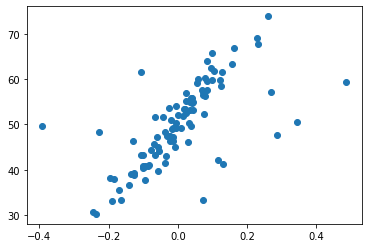

In [14]:
#Prepare dataset
def get_dataset():
    X, y = make_regression(n_samples=100,n_features=1,tail_strength=0.9,effective_rank=1,n_informative=1,noise=3,bias=50,random_state=1)
    # add some artificial outliears
    seed(1)
    for i in range(10):
        factor = randint(2,4)
        if random()>0.5:
            X[i] += factor*X.std()
        else:
            X[i] -= factor*X.std()
    return X,y

# Load Dataset
X,y = get_dataset()
# summarize shape
print(X.shape,y.shape)
# scatter plot for  input vs output
pyplot.scatter(X,y)
pyplot.show()

In [15]:
# Linear Regression
def evaluate_model(X,y,model):
    #define model evaluation method
    cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
    #evaluate model
    scores = cross_val_score(model,X,y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=1)
    return absolute(scores)

In [16]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
    # fut the model on all data
    model.fit(X, y)
    # plot the dataset
    pyplot.scatter(X, y)
    # plot the line of best fit
    xaxis = arange(X.min(), X.max(), 0.01)
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    pyplot.plot(xaxis, yaxis, color='r')
    # show the plot
    pyplot.title(type(model).__name__)
    pyplot.show()

Mean MAE:4.386 (2.209)


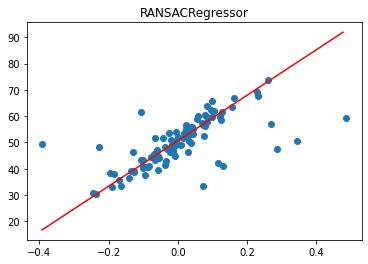

In [17]:
X,y = get_dataset()
#model = LinearRegression()
#model = HuberRegressor()
model = RANSACRegressor()
results = evaluate_model(X,y,model)
print('Mean MAE:%.3f (%.3f)'% (mean(results),std(results)))
plot_best_fit(X,y,model)

In [1]:
git clone https://github.com/rakhimovv/tcav.git

SyntaxError: invalid syntax (<ipython-input-1-01716bce7c8a>, line 1)